In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Longitud de la caja
l = 10 
#Lado de una grilla
d = 0.1
#Número de puntos en la malla
n = int(l/d)+1


In [4]:
#Definimos la grilla en un cuadrado, representando el potencial
V = np.zeros((n,n))
#Ponemos las condiciones iniciales
V[:,-1] = 5.0

In [6]:
#Número de iteraciones
iterations = 100
#presición
p = 0.1
for k in range(iterations):
    diff = 0
    for i in range(1,n-1):
        for j in range(1,n-1):
            new_V = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
            diff = diff + (new_V-V[i,j])/(V[i,j])
            V[i,j] = new_V
    if diff < p:
        break
            

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1512\2923762242.py:10: RuntimeWarning: invalid value encountered in scalar divide
  diff = diff + (new_V-V[i,j])/(V[i,j])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1512\2923762242.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  diff = diff + (new_V-V[i,j])/(V[i,j])


In [7]:
#Creación de la malla
x = np.linspace(0,l,n)
y = np.linspace(0,l,n)
X,Y = np.meshgrid(x,y)

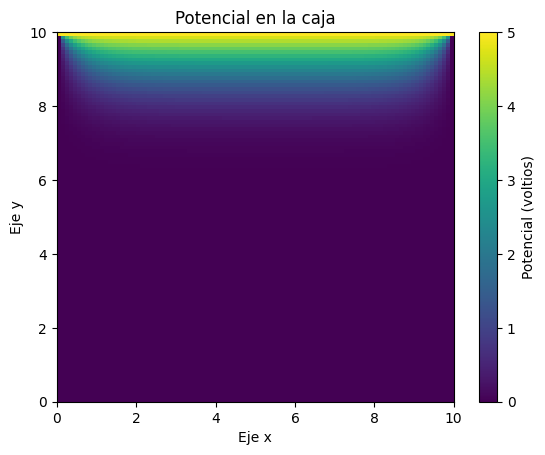

In [8]:
plt.imshow(V.T, cmap='viridis', extent=[0, l, 0, l], origin='lower', aspect='auto')
plt.colorbar(label='Potencial (voltios)')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Potencial en la caja')
plt.show()

In [9]:
#Ahora, para 1000 iteraciones
#Número de iteraciones
iterations = 1000
#presición
p = 0.01
for k in range(iterations):
    diff = 0
    for i in range(1,n-1):
        for j in range(1,n-1):
            new_V = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
            diff = diff + (new_V-V[i,j])/(V[i,j])
            V[i,j] = new_V
    if diff < p:
        break

In [10]:
#Creación de la malla
x = np.linspace(0,l,n)
y = np.linspace(0,l,n)
X,Y = np.meshgrid(x,y)

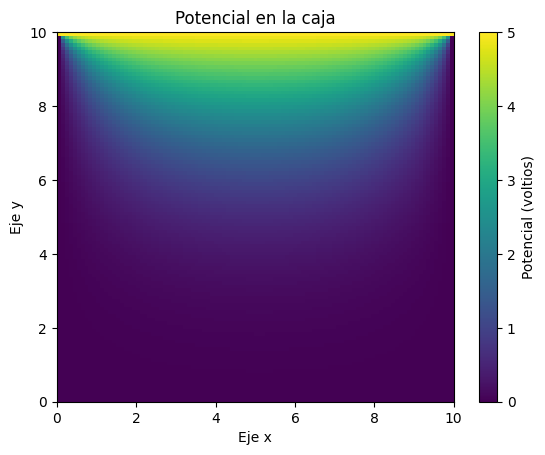

In [11]:
plt.imshow(V.T, cmap='viridis', extent=[0, l, 0, l], origin='lower', aspect='auto')
plt.colorbar(label='Potencial (voltios)')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Potencial en la caja')
plt.show()

In [32]:
def V_teo(k):
    a=20/((2 * k + 1)*np.pi * np.sinh((2 * k + 1)*np.pi))
    res= a * np.sin(((2 * k + 1)*np.pi*5)/(10)) * np.sinh(((2 * k + 1)*np.pi*5)/(10))
    return res

In [33]:
#Calculo para observar las diferencias en el calculo

#Número de iteraciones
iterations = 100
#presición
p = 0.01
max_val=0
for k in range(iterations):
    diff = 0
    for i in range(1,n-1):
        for j in range(1,n-1):
            new_V = 0.25 * (V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1])
            diff = diff + (new_V-V[i,j])/(V[i,j])
            delta_V= abs(V[i,j]-V_teo(k))
            V[i,j] = new_V
        if delta_V > max_val:
           max_val=delta_V
           porc=(max_val/V_teo(k))*100
    if diff < p:
        break

In [34]:
print(max_val)
print(porc)
#No se realizó la actividad para 0.01 ya que el código tardaba mucho tiempo, sin embargo se puede observar que se obtiene un mejor resultado con 0.01

4.9045185199462
-25729.84010012926
